In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import utils
%matplotlib inline
# from copy import deepcopy
# plt.rcParams['figure.dpi'] = 200
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rc('font', size=12)
print("Imported all")

Imported all


In [5]:
import torch
import pickle, io
# deal with the gpu tensors
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [16]:

none_fpth = "./train_outputs/resnet18-layer-None-category-209-2024-11-26-00-20-27/stats_epk40.pkl"
with open(none_fpth, 'rb') as f:
    none_stats = CPU_Unpickler(f).load()
print(none_stats.keys())
print(max(none_stats["val_acc1_epk"]))

bandpass_fpth = "./train_outputs/resnet18-layer-bandpass-category-209-2024-11-26-00-16-03/stats_epk40.pkl"
with open(bandpass_fpth, 'rb') as f:
    bandpass_stats = CPU_Unpickler(f).load()
print(bandpass_stats.keys())
print(len(bandpass_stats["train_loss_cls_epk"]))
print(max(bandpass_stats["val_acc1_epk"]))


dict_keys(['train_loss_cls_epk', 'train_acc1_epk', 'train_acc5_epk', 'val_loss_cls_epk', 'val_acc1_epk', 'val_acc5_epk'])
87.88
dict_keys(['train_loss_cls_epk', 'train_acc1_epk', 'train_acc5_epk', 'val_loss_cls_epk', 'val_acc1_epk', 'val_acc5_epk'])
41
81.84


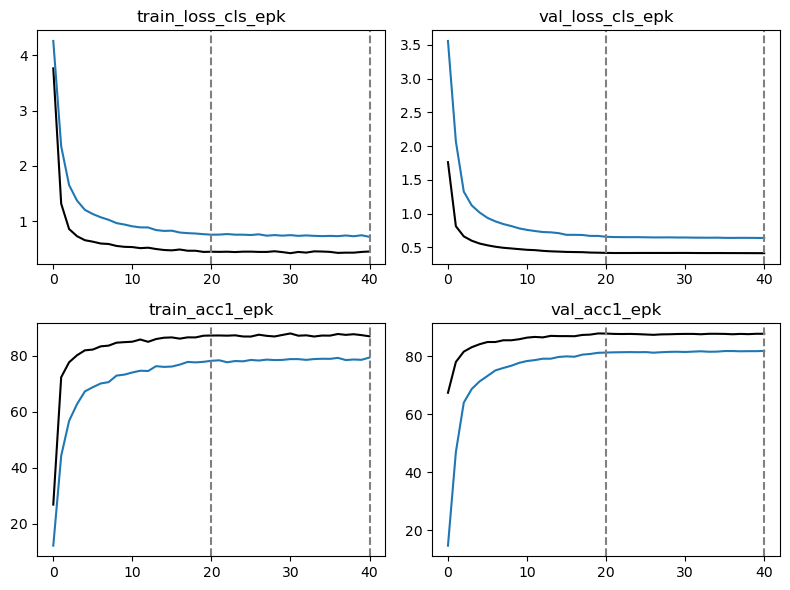

In [12]:
plt.figure(figsize=(8, 6))
plot_vals = ["train_loss_cls_epk", "val_loss_cls_epk", "train_acc1_epk", "val_acc1_epk"]
lr_change = [20, 40]

for i in range(len(plot_vals)):
    dat_none = none_stats[plot_vals[i]]
    dat_bandpass = bandpass_stats[plot_vals[i]]
    x = np.arange(len(dat_none))

    plt.subplot(2, 2, i + 1)
    plt.plot(x, dat_none, label="None", color="black")
    plt.plot(x, dat_bandpass, label="Bandpass")
    plt.title(plot_vals[i])

    for c in lr_change:
        plt.axvline(x = c, linestyle="--", color="grey")
plt.tight_layout()  # Adjusts the spacing between subplots for better layout
plt.show()
